In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = r"C:\Users\Abhim\Documents\Python_Programs\airfare_dset\Cleaned_dataset.csv"
df = pd.read_csv(file)

df['Date_of_journey'] = pd.to_datetime(df['Date_of_journey'])

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452088 entries, 0 to 452087
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Date_of_journey    452088 non-null  datetime64[ns]
 1   Journey_day        452088 non-null  object        
 2   Airline            452088 non-null  object        
 3   Flight_code        452088 non-null  object        
 4   Class              452088 non-null  object        
 5   Source             452088 non-null  object        
 6   Departure          452088 non-null  object        
 7   Total_stops        452088 non-null  object        
 8   Arrival            452088 non-null  object        
 9   Destination        452088 non-null  object        
 10  Duration_in_hours  452088 non-null  float64       
 11  Days_left          452088 non-null  int64         
 12  Fare               452088 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), 

In [3]:
df.head()

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
0,2023-01-16,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335
1,2023-01-16,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899
2,2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801
3,2023-01-16,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794
4,2023-01-16,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955


In [4]:
df = df.dropna()
df.drop_duplicates( keep='first', inplace=True)
df = df.reset_index(drop = True)
df.shape

(445366, 13)

In [5]:
#find cts of all airlines

airlines=df.groupby(['Airline','Flight_code'],as_index=False).count()
airlines.Airline.value_counts()

percentages = airlines.Airline.value_counts()/sum(airlines.Airline.value_counts())*100
percentages




Airline
Indigo         49.964413
Air India      12.170819
Vistara        11.743772
AirAsia         7.544484
GO FIRST        7.402135
SpiceJet        6.548043
AkasaAir        3.629893
AllianceAir     0.711744
StarAir         0.284698
Name: count, dtype: float64

In [6]:
#find class div

class_div=df.groupby(['Class','Flight_code'],as_index=False).count()
print ("Class vs no. of flights they are available in: ")
print (class_div.Class.value_counts())

print ("\n""Total no. of seats booked in a class overall: ")
df['Class'].value_counts()

Class vs no. of flights they are available in: 
Class
Economy            1401
Business            295
Premium Economy     137
First                 3
Name: count, dtype: int64

Total no. of seats booked in a class overall: 


Class
Economy            248323
Business           126535
Premium Economy     70364
First                 144
Name: count, dtype: int64

In [7]:
#find most freq time

print (df['Departure'].value_counts())
print (df['Arrival'].value_counts())

Departure
6 AM - 12 PM    181019
After 6 PM      126749
12 PM - 6 PM    114743
Before 6 AM      22855
Name: count, dtype: int64
Arrival
After 6 PM      196972
6 AM - 12 PM    117665
12 PM - 6 PM    100322
Before 6 AM      30407
Name: count, dtype: int64


In [8]:
#find most pop src and dst

print(df['Source'].value_counts(),'\n')
print(df['Destination'].value_counts())

Source
Delhi        82481
Mumbai       79894
Bangalore    72668
Hyderabad    56054
Chennai      55659
Kolkata      54193
Ahmedabad    44417
Name: count, dtype: int64 

Destination
Mumbai       81675
Delhi        76758
Bangalore    71603
Hyderabad    61775
Chennai      57060
Kolkata      53465
Ahmedabad    43030
Name: count, dtype: int64


C:\Users\Abhim\AppData\Local\Temp\ipykernel_26708\577147089.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_data = df.groupby(['Source', 'Destination', 'Journey_day']).size().reset_index(name='Total_Flights')
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to reta

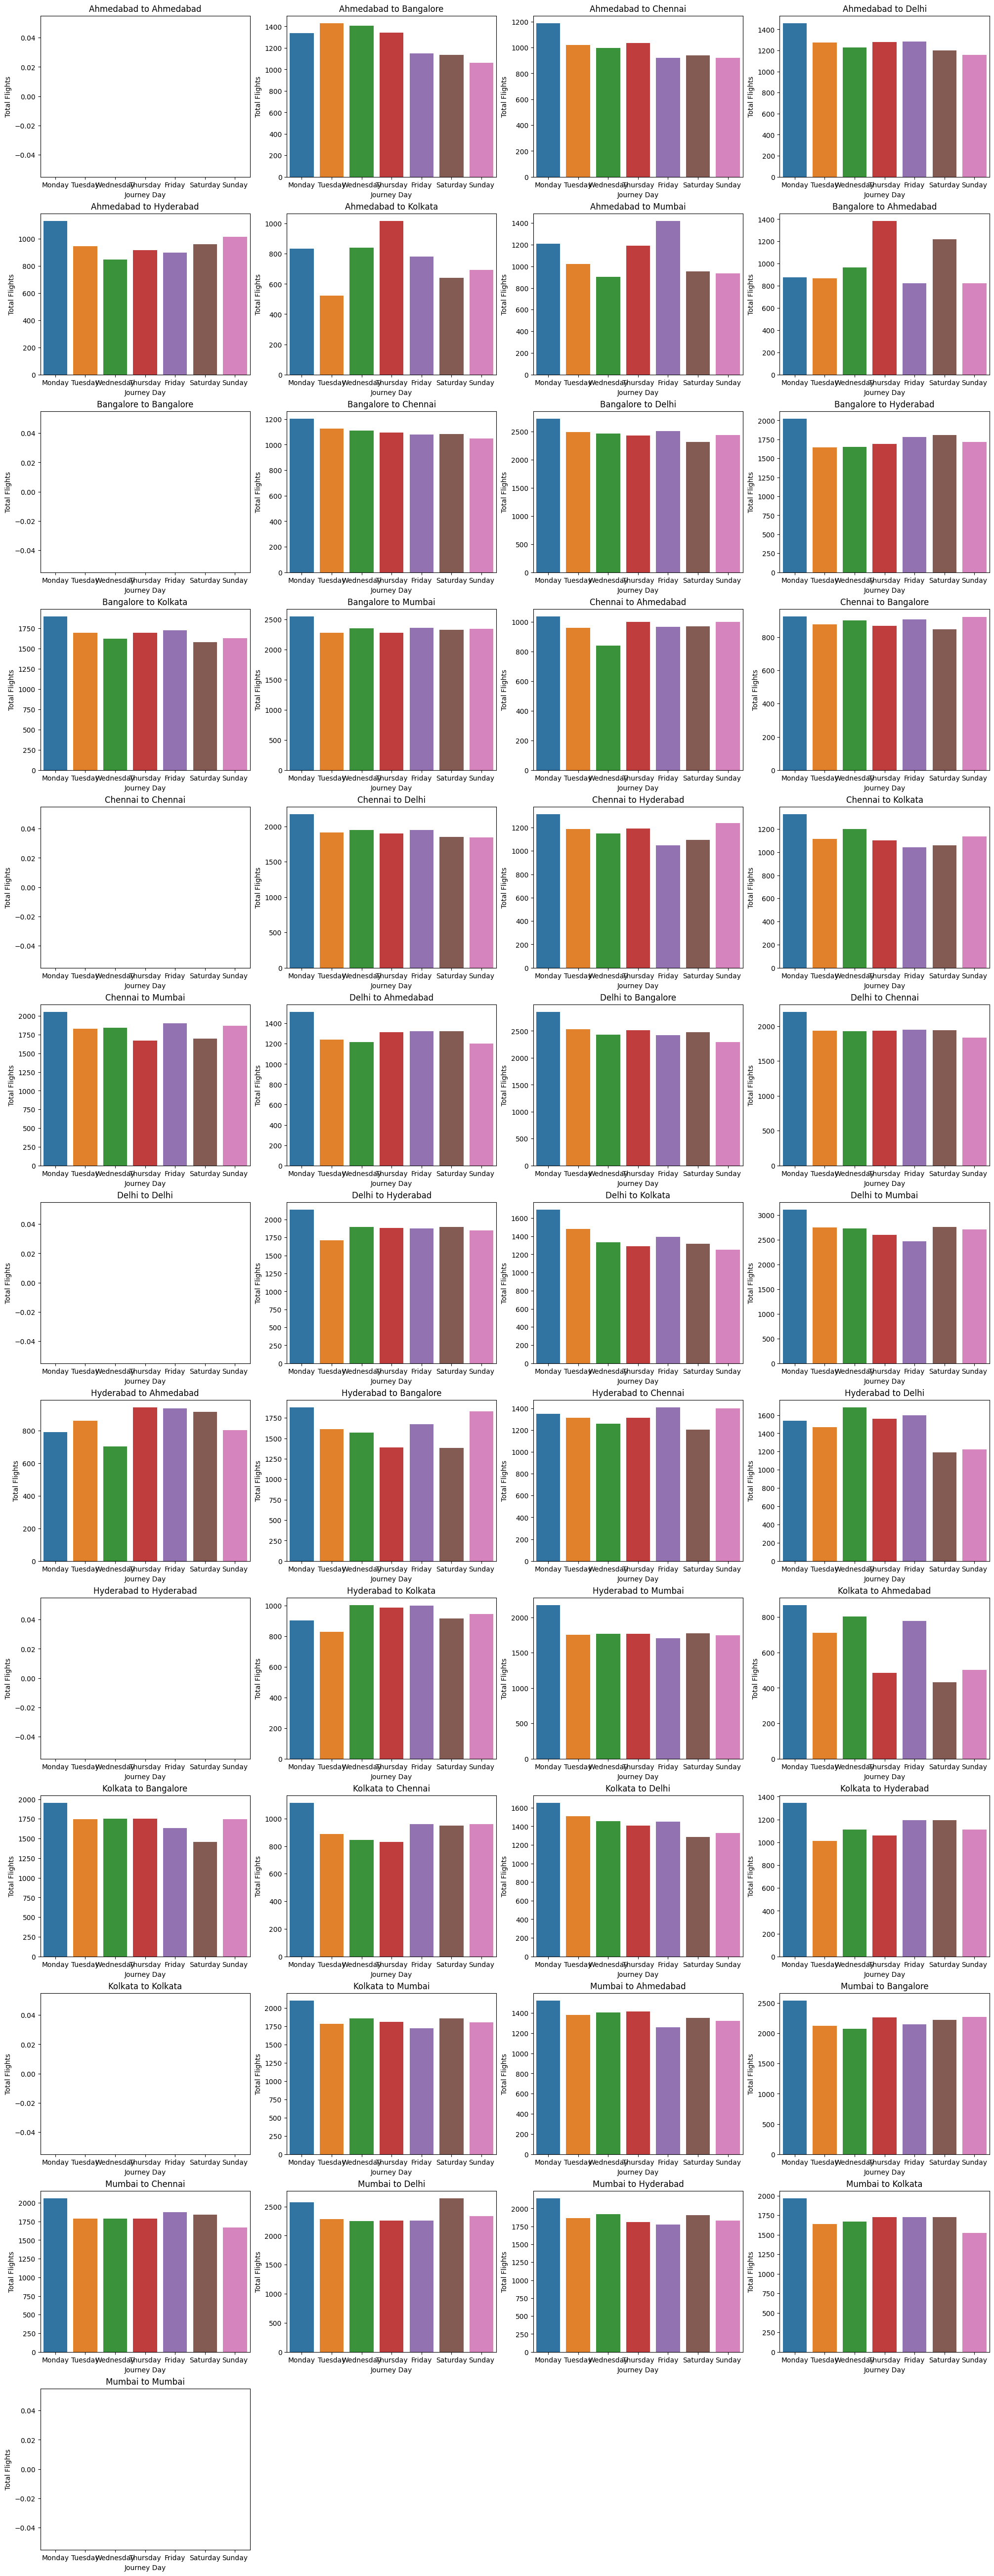

In [9]:
df['Journey_day'] = pd.Categorical(df['Journey_day'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

# Aggregate the data
aggregated_data = df.groupby(['Source', 'Destination', 'Journey_day']).size().reset_index(name='Total_Flights')

# Create a grid of subplots
unique_pairs = aggregated_data[['Source', 'Destination']].drop_duplicates()
n_pairs = unique_pairs.shape[0]
cols = 4  # Number of columns for the subplots grid
rows = (n_pairs // cols) + (n_pairs % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 4), constrained_layout=True)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plotting each pair
for i, (source, destination) in enumerate(unique_pairs.values):
    subset = aggregated_data[(aggregated_data['Source'] == source) & (aggregated_data['Destination'] == destination)]
    ax = axes[i]
    sns.barplot(data=subset, x='Journey_day', y='Total_Flights', ax=ax)
    ax.set_title(f'{source} to {destination}')
    ax.set_xlabel('Journey Day')
    ax.set_ylabel('Total Flights')

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

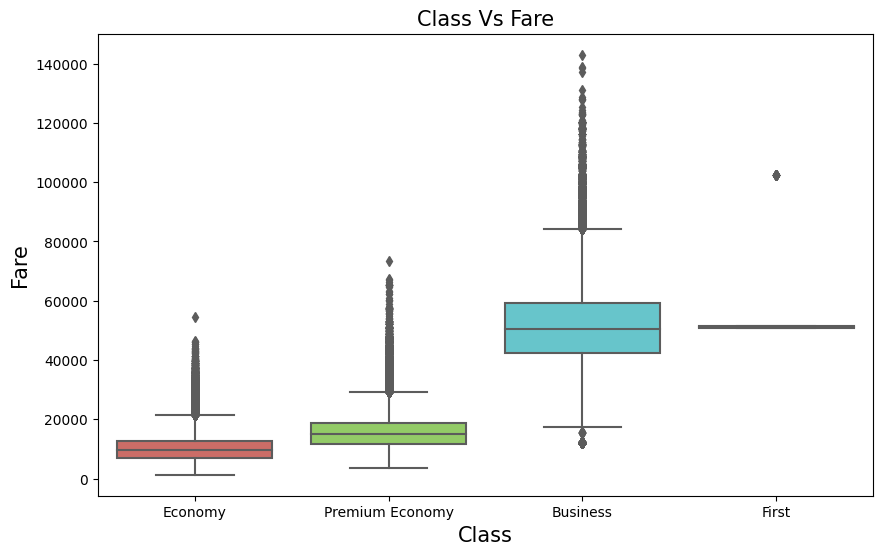

In [10]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(x='Class',y='Fare',data=df,palette='hls')
plt.title('Class Vs Fare',fontsize=15)
plt.xlabel('Class',fontsize=15)
plt.ylabel('Fare',fontsize=15)
plt.show()

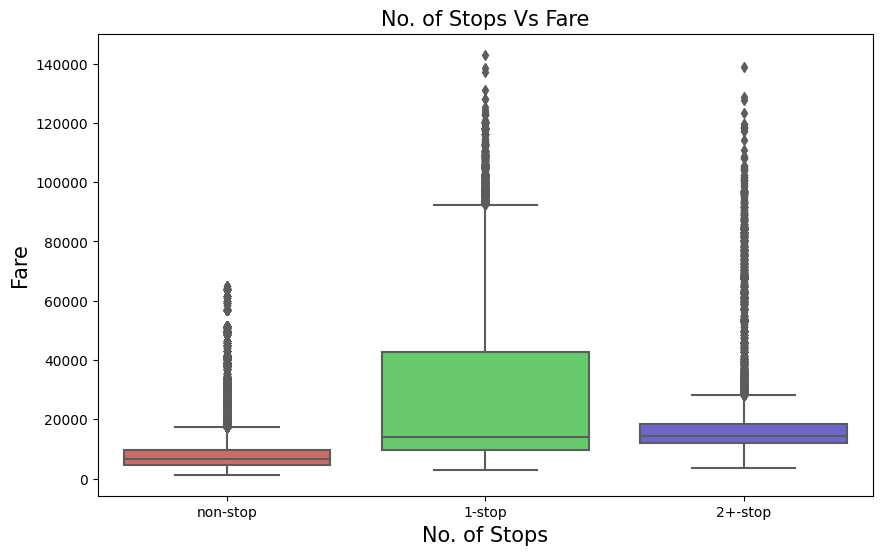

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Total_stops',y='Fare',data=df,palette='hls')
plt.title('No. of Stops Vs Fare',fontsize=15)
plt.xlabel('No. of Stops',fontsize=15)
plt.ylabel('Fare',fontsize=15)
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Airline'] = le.fit_transform(df['Airline'])
print (dict(zip(le.classes_,range(len(le.classes_)))))
df['Source'] = le.fit_transform(df['Source'])
df['Destination'] = le.fit_transform(df['Destination'])
df['Class'] = le.fit_transform(df['Class'])
print (dict(zip(le.classes_,range(len(le.classes_)))))
df['Arrival'] = le.fit_transform(df['Arrival'])
df['Departure'] = le.fit_transform(df['Departure'])
df['Journey_day'] = le.fit_transform(df['Journey_day'])
df['Flight_code'] = le.fit_transform(df['Flight_code'])
df['Total_stops'] = le.fit_transform(df['Total_stops'])

{'Air India': 0, 'AirAsia': 1, 'AkasaAir': 2, 'AllianceAir': 3, 'GO FIRST': 4, 'Indigo': 5, 'SpiceJet': 6, 'StarAir': 7, 'Vistara': 8}
{'Business': 0, 'Economy': 1, 'First': 2, 'Premium Economy': 3}


In [13]:
holidays = r"C:\Users\Abhim\Downloads\holidays_2023_dset\India_IN.csv"

holidays_df = pd.read_csv(holidays)
holidays_df["Date"] = pd.to_datetime(holidays_df["Date"], format = "%d/%m/%Y")

holidays_df["Day"] = holidays_df["Date"].dt.weekday

print (holidays_df["Type"].unique())

["['Optional holiday']" "['Hinduism', 'Optional holiday']"
 "['Observance']" "['National holiday']"
 "['National holiday', 'Hinduism']" "['Season']"
 "['Observance', 'Christian']" "['Muslim', 'Common local holiday']"
 "['Observance', 'Hinduism']"]


In [14]:
#check if the date in df is a holiday or not from the holidays_df

df['Is_Holiday'] = df['Date_of_journey'].isin(holidays_df['Date']).astype(int)

#check if date in df is friday or monday and if it is a holiday from holidays_df

df['Is_Friday'] = (df['Date_of_journey'].dt.weekday == 4).astype(int)
print(df["Is_Friday"].value_counts())
df['Is_Monday'] = (df['Date_of_journey'].dt.weekday == 0).astype(int)
print(df["Is_Monday"].value_counts())
df['Is_Friday_Holiday'] = (df['Is_Friday'] & df['Is_Holiday']).astype(int)
print(df["Is_Friday_Holiday"].value_counts())
df['Is_Monday_Holiday'] = (df['Is_Monday'] & df['Is_Holiday']).astype(int)
print(df["Is_Monday_Holiday"].value_counts())

df['Is_Long_Weekend'] = (df['Is_Friday_Holiday'] | df['Is_Monday_Holiday']).astype(int)

#drop is_friday and is_monday as they are not needed anymore
df.drop(['Is_Friday', 'Is_Monday', 'Is_Friday_Holiday', 'Is_Monday_Holiday'],axis=1,inplace=True)

df.head()

Is_Friday
0    382331
1     63035
Name: count, dtype: int64
Is_Monday
0    374172
1     71194
Name: count, dtype: int64
Is_Friday_Holiday
0    445366
Name: count, dtype: int64
Is_Monday_Holiday
0    445366
Name: count, dtype: int64


,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare,Is_Holiday,Is_Long_Weekend
0,2023-01-16,1,6,1209,1,3,2,2,2,6,2.0833,1,5335,0,0
1,2023-01-16,1,5,164,1,3,2,2,3,6,2.3333,1,5899,0,0
2,2023-01-16,1,4,942,1,3,2,2,3,6,2.1667,1,5801,0,0
3,2023-01-16,1,6,1224,1,3,2,2,2,6,2.0833,1,5794,0,0
4,2023-01-16,1,0,852,1,3,2,2,2,6,2.1667,1,5955,0,0


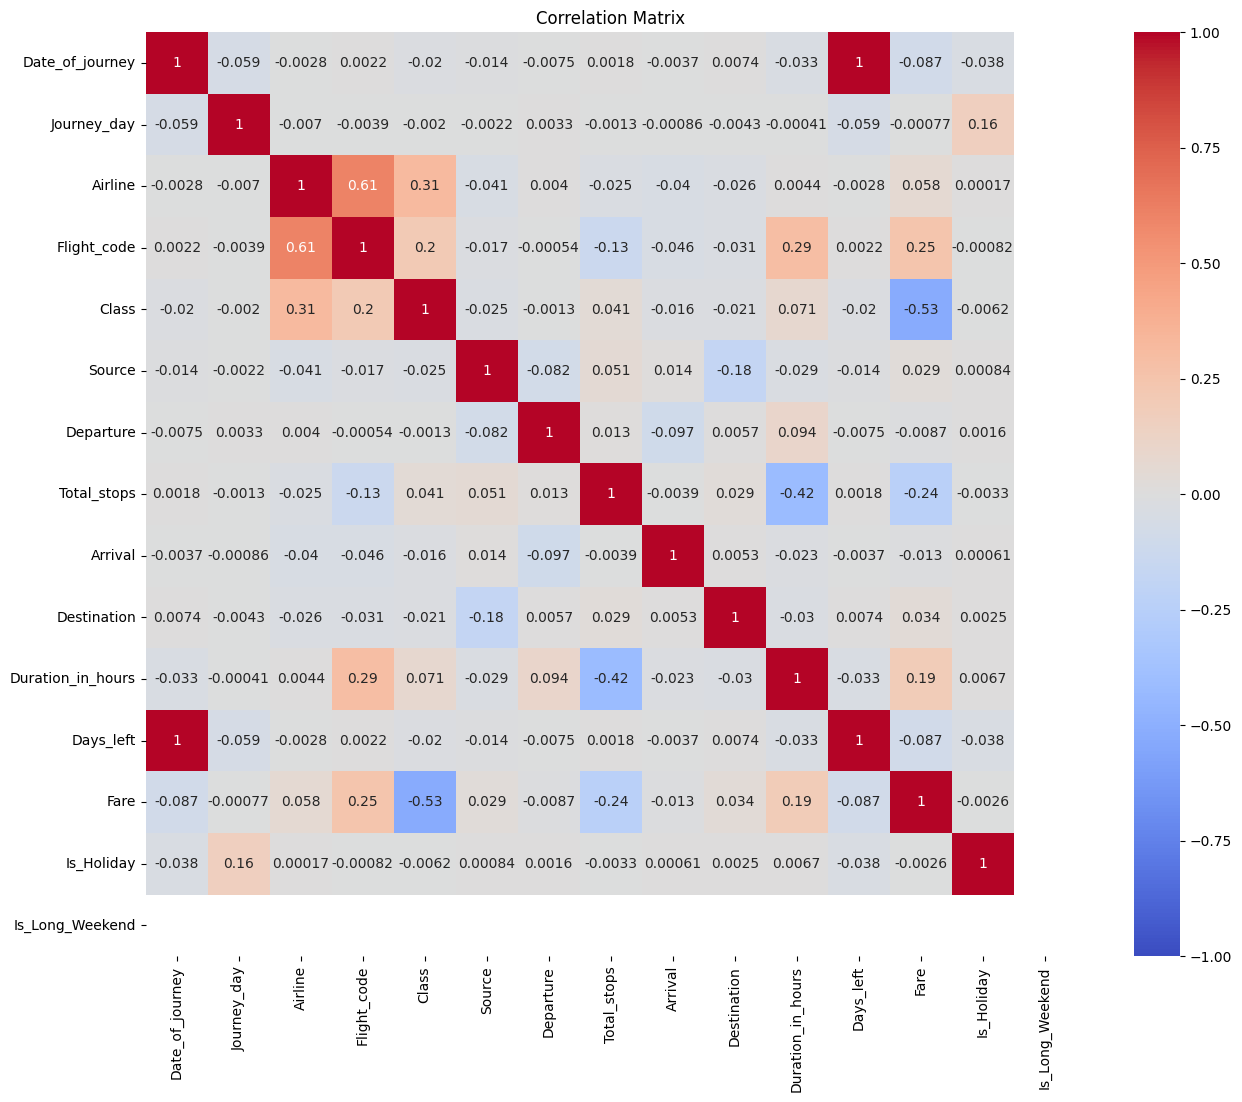

In [15]:
corr_mat = df.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [16]:
df.describe()

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare,Is_Holiday,Is_Long_Weekend
count,445366,445366.000000,445366.000000,445366.000000,445366.000000,445366.000000,445366.000000,445366.000000,445366.000000,445366.000000,445366.000000,445366.000000,445366.000000,445366.000000,445366.0
mean,2023-02-09 14:49:39.837706752,2.961587,5.025274,1022.097385,1.032192,3.156896,1.129592,0.293228,1.353561,3.189449,12.182491,25.617822,22919.747165,0.141248,0.0
min,2023-01-16 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,1.000000,1307.000000,0.000000,0.0
25%,2023-01-28 00:00:00,1.000000,0.000000,776.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,6.500000,13.000000,8712.000000,0.000000,0.0
50%,2023-02-10 00:00:00,3.000000,8.000000,1249.000000,1.000000,3.000000,1.000000,0.000000,2.000000,3.000000,11.250000,26.000000,13362.000000,0.000000,0.0
75%,2023-02-22 00:00:00,5.000000,8.000000,1333.000000,1.000000,5.000000,2.000000,0.000000,2.000000,5.000000,16.333300,38.000000,36980.000000,0.000000,0.0
max,2023-03-06 00:00:00,6.000000,8.000000,1404.000000,3.000000,6.000000,3.000000,2.000000,3.000000,6.000000,43.583300,50.000000,143019.000000,1.000000,0.0
std,NaN,2.004795,3.445273,365.991176,0.956749,1.969188,0.854815,0.663070,0.903117,1.968318,7.299361,14.302610,20394.214040,0.348277,0.0


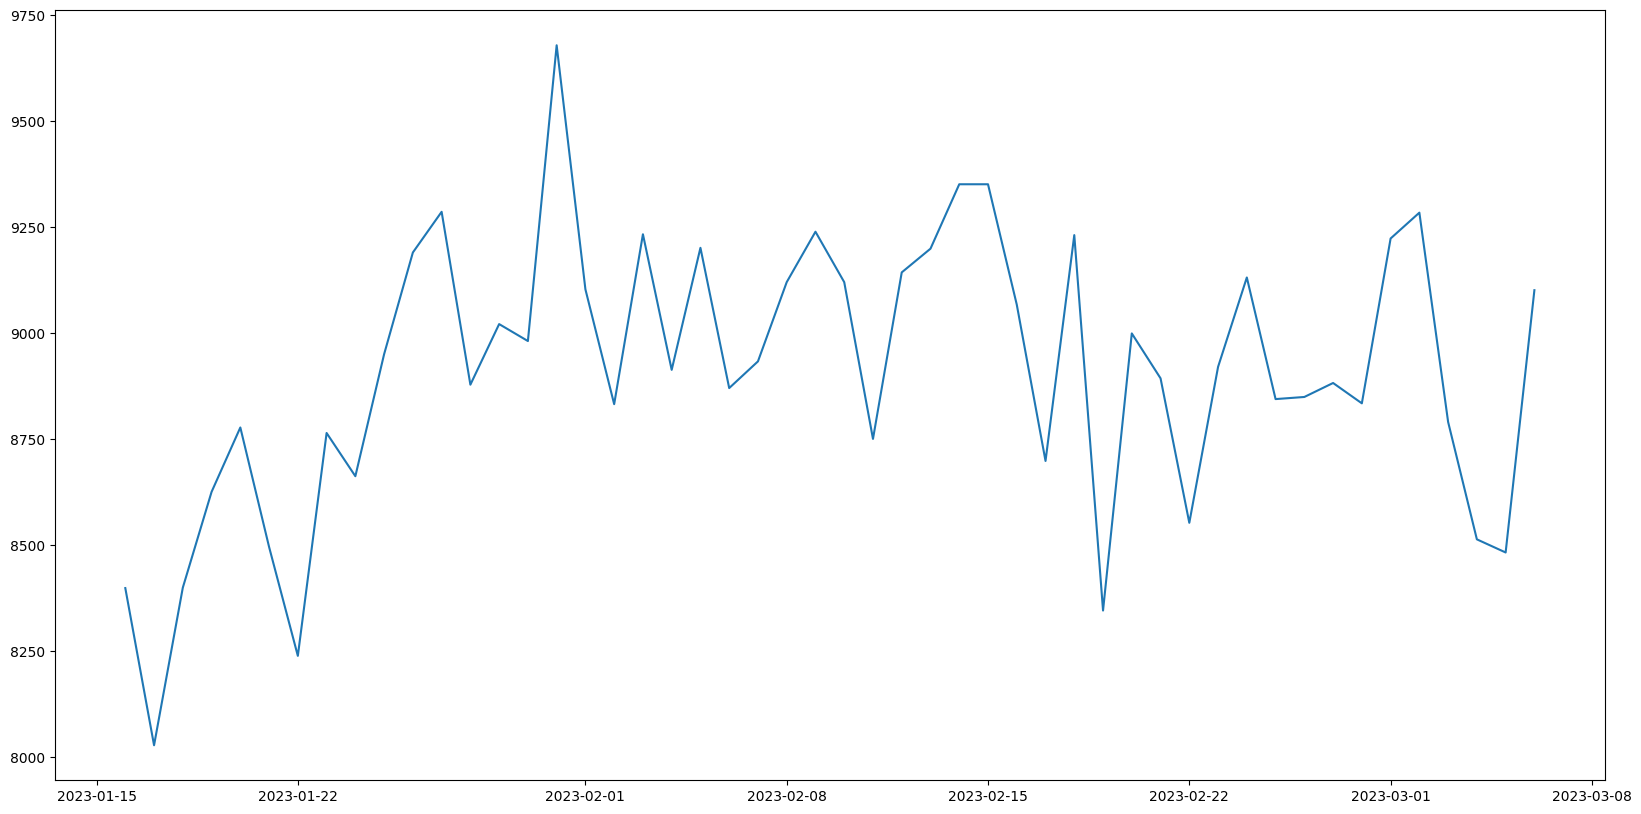

In [17]:
flights_per_day = df.groupby('Date_of_journey').size().reset_index(name='Total_Flights')
plt.figure (figsize=(20,10))
plt.plot(flights_per_day['Date_of_journey'], flights_per_day['Total_Flights'])

c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length

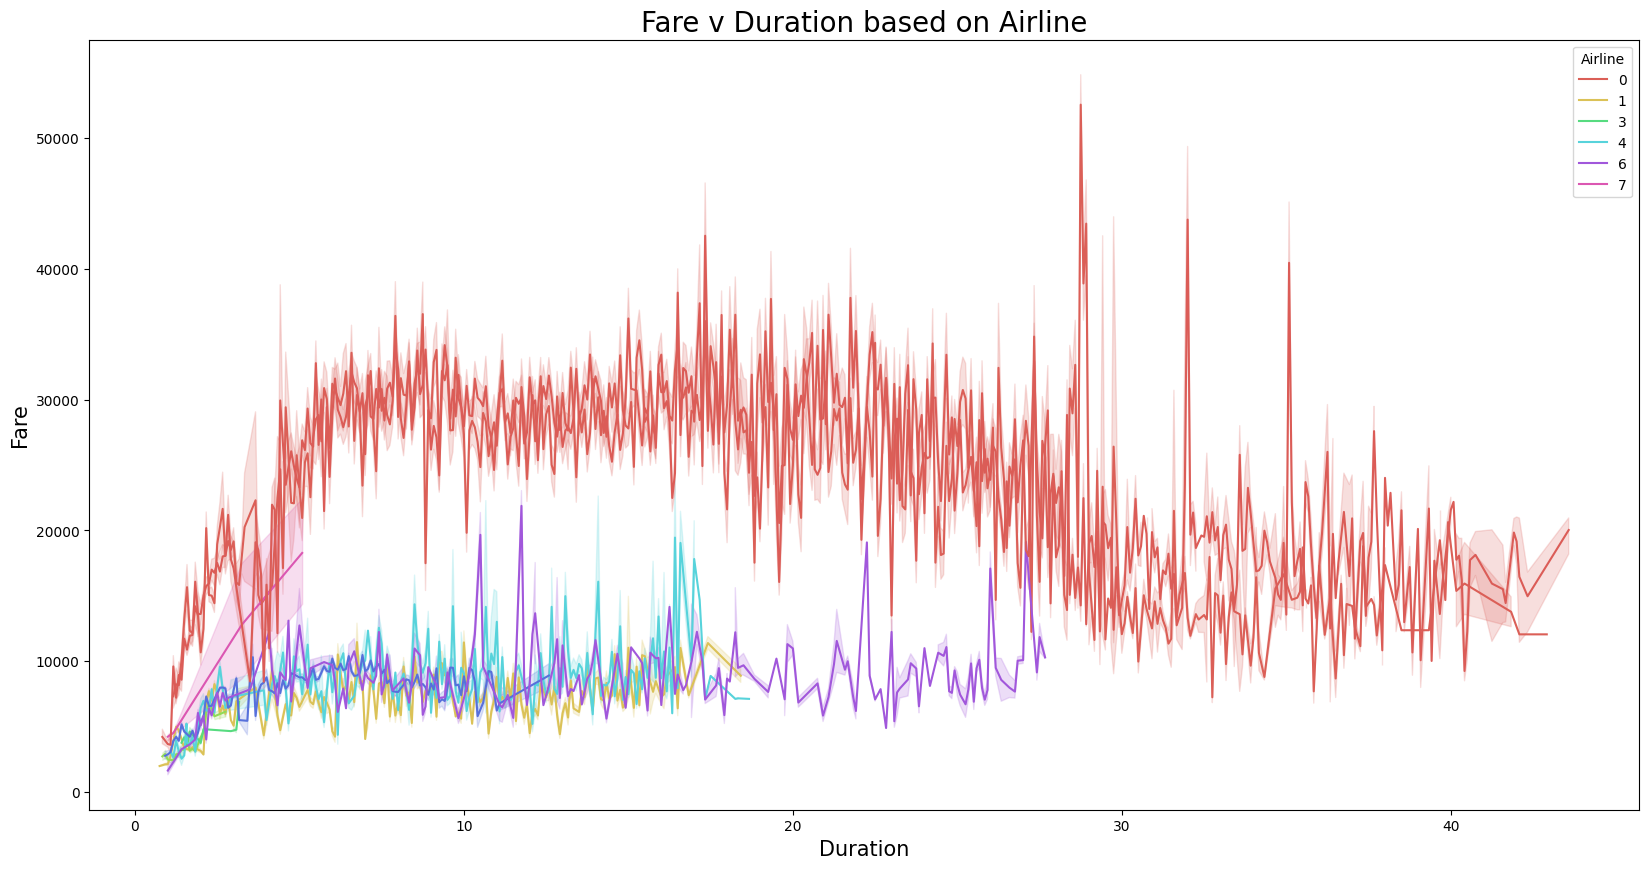

In [18]:
plt.figure(figsize=(20, 10))
sns.lineplot(data = df,x = 'Duration_in_hours',y = 'Fare',hue = 'Airline',palette = 'hls')
plt.title('Fare v Duration based on Airline',fontsize = 20)
plt.xlabel('Duration',fontsize = 15)
plt.ylabel('Fare',fontsize = 15)
plt.show()

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

In [20]:
df.to_csv('df_fixed.csv', index=False)

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

models_dict = {}

df.sort_values(by='Date_of_journey')

df['year'] = df['Date_of_journey'].dt.year
df['month'] = df['Date_of_journey'].dt.month
df['day'] = df['Date_of_journey'].dt.day


X=df.drop(['Fare','Date_of_journey'],axis=1)
y=df['Fare']

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X['Duration_in_hours'] = scaler.fit_transform(X[['Duration_in_hours']])
X['Days_left'] = scaler.fit_transform(X[['Days_left']])

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)

X_train

,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Is_Holiday,Is_Long_Weekend,year,month,day
350132,4,8,1300,0,2,0,0,2,3,-0.675744,-0.532618,0,0,2023,2,2
253225,0,8,1304,3,4,1,0,2,6,-0.047839,0.516143,0,0,2023,2,17
300824,3,5,4,1,5,2,0,2,3,-1.052489,1.634821,0,0,2023,3,5
203178,5,5,355,1,1,2,0,1,4,-0.572995,0.306390,1,0,2023,2,14
13353,3,8,1259,0,3,0,0,2,6,-0.835580,0.655977,1,0,2023,2,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,2,0,752,0,4,1,2,1,1,-1.486322,-1.371627,0,0,2023,1,21
365838,3,8,1305,1,2,1,1,2,6,-0.025001,0.166556,0,0,2023,2,12
131932,5,0,856,1,6,1,0,2,5,0.032086,-0.672453,0,0,2023,1,31
146867,5,8,1403,3,6,2,0,0,2,1.322146,0.306390,1,0,2023,2,14


In [22]:
model = DecisionTreeRegressor(criterion='squared_error', random_state=42)

model.fit(X_train, y_train)
y_preds = model.predict(X_test)

In [23]:
score = r2_score(y_preds, y_test)
print (score)

0.9384086385696154


In [24]:
def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

def RMSE (y_test, y_pred):
    return np.sqrt(np.mean((y_test - y_pred) ** 2))

print (MAPE (y_test, y_preds))
RMSE (y_test, y_preds)
models_dict['DecisionTreeRegressor'] = (model, score, MAPE(y_test, y_preds), RMSE (y_test, y_preds))

9.540719979412188


In [25]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_preds})
result=df.merge(out,left_index=True,right_index=True)

In [26]:
'''plt.figure(figsize=(20,8))
plt.figure(figsize=(20,8))
sns.lineplot(data=result, x='Date_of_journey', y='Price_actual', label='Actual', color='blue')
sns.lineplot(data=result, x='Date_of_journey', y='Price_pred', label='Predicted', color='red')
plt.xlabel('Date of Journey')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()'''

"plt.figure(figsize=(20,8))\nplt.figure(figsize=(20,8))\nsns.lineplot(data=result, x='Date_of_journey', y='Price_actual', label='Actual', color='blue')\nsns.lineplot(data=result, x='Date_of_journey', y='Price_pred', label='Predicted', color='red')\nplt.xlabel('Date of Journey')\nplt.ylabel('Target Value')\nplt.title('Comparison of Actual and Predicted Values')\nplt.legend()\nplt.show()"

In [27]:
'''plt.figure(figsize=(20,8))
sns.lineplot(data=result, x='Flight_code', y='Price_actual', label='Actual', color='blue')
sns.lineplot(data=result, x='Flight_code', y='Price_pred', label='Predicted', color='red')
plt.xlabel('Flight Code')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()'''

"plt.figure(figsize=(20,8))\nsns.lineplot(data=result, x='Flight_code', y='Price_actual', label='Actual', color='blue')\nsns.lineplot(data=result, x='Flight_code', y='Price_pred', label='Predicted', color='red')\nplt.xlabel('Flight Code')\nplt.ylabel('Target Value')\nplt.title('Comparison of Actual and Predicted Values')\nplt.legend()\nplt.show()"

In [28]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_preds = model.predict(X_test)


In [29]:
score = r2_score(y_preds, y_test)
print (score)
print(MAPE (y_test, y_preds))

models_dict['RandomForestRegressor'] = (model, score, MAPE(y_test, y_preds), RMSE (y_test, y_preds))

0.9647052338726717
8.16001864237765


In [30]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_preds})
result=df.merge(out,left_index=True,right_index=True)

result.head(100)

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare,Is_Holiday,Is_Long_Weekend,year,month,day,Price_actual,Price_pred
24,2023-01-16,1,1,1057,1,3,1,0,3,6,16.5000,1,6872,0,0,2023,1,16,6872,6954.82
30,2023-01-16,1,5,87,1,3,0,2,0,6,2.3333,1,7319,0,0,2023,1,16,7319,7711.09
31,2023-01-16,1,8,1396,1,3,2,2,2,6,2.2500,1,7320,0,0,2023,1,16,7320,11266.68
35,2023-01-16,1,4,899,1,3,0,0,2,6,9.7500,1,6873,0,0,2023,1,16,6873,8521.04
53,2023-01-16,1,5,46,1,3,0,2,2,6,2.2500,1,7844,0,0,2023,1,16,7844,7533.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,2023-01-17,5,5,195,1,3,0,0,2,6,6.2500,2,11257,0,0,2023,1,17,11257,13409.62
502,2023-01-17,5,8,1252,1,3,0,0,2,6,5.2500,2,11573,0,0,2023,1,17,11573,13430.31
508,2023-01-17,5,4,913,1,3,1,0,2,6,8.5833,2,11546,0,0,2023,1,17,11546,11066.45
517,2023-01-17,5,8,1327,1,3,1,0,0,6,6.4167,2,12570,0,0,2023,1,17,12570,21487.60


In [31]:
airline_df = result[result['Airline']==4]
airline_df = airline_df[airline_df['Class']==1]

c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

<Figure size 2000x800 with 0 Axes>

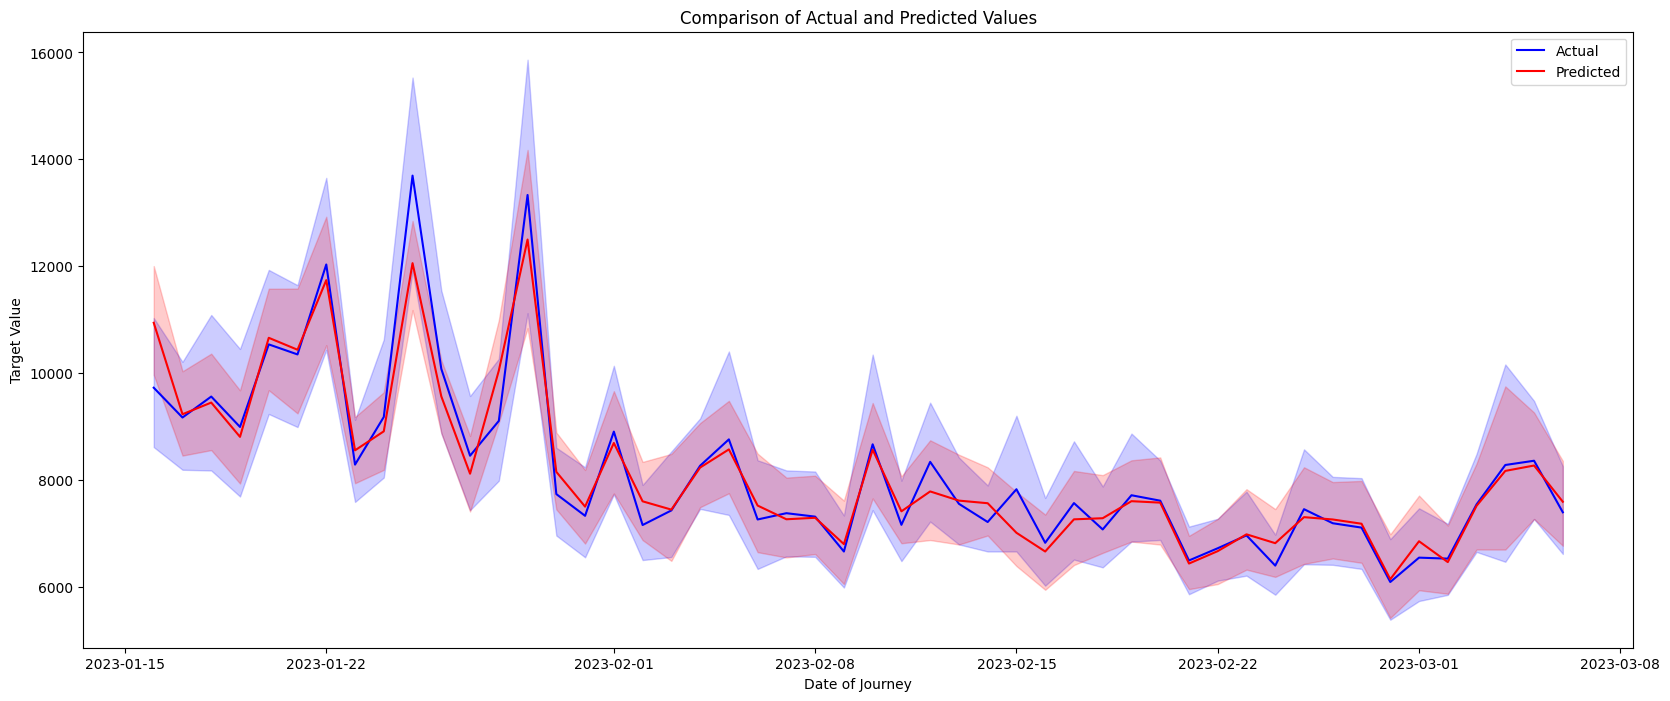

In [32]:
plt.figure(figsize=(20,8))
plt.figure(figsize=(20,8))
sns.lineplot(data=airline_df, x='Date_of_journey', y='Price_actual', label='Actual', color='blue')
sns.lineplot(data=airline_df, x='Date_of_journey', y='Price_pred', label='Predicted', color='red')
plt.xlabel('Date of Journey')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

In [33]:
'''plt.figure(figsize=(20,8))
plt.figure(figsize=(20,8))
sns.lineplot(data=result, x='Date_of_journey', y='Price_actual', label='Actual', color='blue')
sns.lineplot(data=result, x='Date_of_journey', y='Price_pred', label='Predicted', color='red')
plt.xlabel('Date of Journey')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()'''

"plt.figure(figsize=(20,8))\nplt.figure(figsize=(20,8))\nsns.lineplot(data=result, x='Date_of_journey', y='Price_actual', label='Actual', color='blue')\nsns.lineplot(data=result, x='Date_of_journey', y='Price_pred', label='Predicted', color='red')\nplt.xlabel('Date of Journey')\nplt.ylabel('Target Value')\nplt.title('Comparison of Actual and Predicted Values')\nplt.legend()\nplt.show()"

In [34]:
'''plt.figure(figsize=(20,8))
sns.lineplot(data=result, x='Flight_code', y='Price_actual', label='Actual', color='blue')
sns.lineplot(data=result, x='Flight_code', y='Price_pred', label='Predicted', color='red')
plt.xlabel('Flight Code')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()'''

"plt.figure(figsize=(20,8))\nsns.lineplot(data=result, x='Flight_code', y='Price_actual', label='Actual', color='blue')\nsns.lineplot(data=result, x='Flight_code', y='Price_pred', label='Predicted', color='red')\nplt.xlabel('Flight Code')\nplt.ylabel('Target Value')\nplt.title('Comparison of Actual and Predicted Values')\nplt.legend()\nplt.show()"

In [35]:
import xgboost as xgb

model = xgb.XGBRegressor()
model.get_params()

model = xgb.XGBRegressor(
    booster='gbtree',
    learning_rate=0.3,
    n_estimators=200,
    max_depth=7,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0,
    reg_lambda=1,
    reg_alpha=0,
    objective='reg:squarederror',
    seed=42
)

In [36]:
model.fit(X_train, y_train)
y_preds = model.predict(X_test)


In [37]:
score = r2_score(y_preds, y_test)
print (score)
print (MAPE (y_test, y_preds))

models_dict['XGBRegressor'] = (model, score, MAPE(y_test, y_preds), RMSE (y_test, y_preds))

0.9583413036284755
12.154522283503912


In [38]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_preds})
result=df.merge(out,left_index=True,right_index=True)

result.head(100)

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare,Is_Holiday,Is_Long_Weekend,year,month,day,Price_actual,Price_pred
24,2023-01-16,1,1,1057,1,3,1,0,3,6,16.5000,1,6872,0,0,2023,1,16,6872,6693.604980
30,2023-01-16,1,5,87,1,3,0,2,0,6,2.3333,1,7319,0,0,2023,1,16,7319,8244.137695
31,2023-01-16,1,8,1396,1,3,2,2,2,6,2.2500,1,7320,0,0,2023,1,16,7320,14208.980469
35,2023-01-16,1,4,899,1,3,0,0,2,6,9.7500,1,6873,0,0,2023,1,16,6873,10962.546875
53,2023-01-16,1,5,46,1,3,0,2,2,6,2.2500,1,7844,0,0,2023,1,16,7844,9750.934570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,2023-01-17,5,5,195,1,3,0,0,2,6,6.2500,2,11257,0,0,2023,1,17,11257,12450.905273
502,2023-01-17,5,8,1252,1,3,0,0,2,6,5.2500,2,11573,0,0,2023,1,17,11573,13827.231445
508,2023-01-17,5,4,913,1,3,1,0,2,6,8.5833,2,11546,0,0,2023,1,17,11546,12207.212891
517,2023-01-17,5,8,1327,1,3,1,0,0,6,6.4167,2,12570,0,0,2023,1,17,12570,16802.474609


In [39]:
'''plt.figure(figsize=(20,8))
sns.lineplot(data=result, x='Date_of_journey', y='Price_actual', label='Actual', color='blue')
sns.lineplot(data=result, x='Date_of_journey', y='Price_pred', label='Predicted', color='red')
plt.xlabel('Date of Journey')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()'''

"plt.figure(figsize=(20,8))\nsns.lineplot(data=result, x='Date_of_journey', y='Price_actual', label='Actual', color='blue')\nsns.lineplot(data=result, x='Date_of_journey', y='Price_pred', label='Predicted', color='red')\nplt.xlabel('Date of Journey')\nplt.ylabel('Target Value')\nplt.title('Comparison of Actual and Predicted Values')\nplt.legend()\nplt.show()"

In [40]:
'''plt.figure(figsize=(20,8))
sns.lineplot(data=result, x='Flight_code', y='Price_actual', label='Actual', color='blue')
sns.lineplot(data=result, x='Flight_code', y='Price_pred', label='Predicted', color='red')
plt.xlabel('Flight Code')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()'''

"plt.figure(figsize=(20,8))\nsns.lineplot(data=result, x='Flight_code', y='Price_actual', label='Actual', color='blue')\nsns.lineplot(data=result, x='Flight_code', y='Price_pred', label='Predicted', color='red')\nplt.xlabel('Flight Code')\nplt.ylabel('Target Value')\nplt.title('Comparison of Actual and Predicted Values')\nplt.legend()\nplt.show()"

In [41]:
import catboost as cb

model = cb.CatBoostRegressor(
    iterations=1000,
    learning_rate=0.3,
    depth=7,
    loss_function='MAE',
    random_seed=42
)


In [42]:
model.fit(X_train, y_train)
y_preds = model.predict(X_test)


0:	learn: 10575.7857424	total: 202ms	remaining: 3m 22s
1:	learn: 8039.4462039	total: 238ms	remaining: 1m 58s
2:	learn: 6380.7007141	total: 276ms	remaining: 1m 31s
3:	learn: 5429.7593960	total: 314ms	remaining: 1m 18s
4:	learn: 4850.7102648	total: 351ms	remaining: 1m 9s
5:	learn: 4504.6764673	total: 389ms	remaining: 1m 4s
6:	learn: 4306.8515046	total: 444ms	remaining: 1m 3s
7:	learn: 4176.0147399	total: 512ms	remaining: 1m 3s
8:	learn: 4081.0024230	total: 548ms	remaining: 1m
9:	learn: 4013.4315184	total: 582ms	remaining: 57.6s
10:	learn: 3959.5832757	total: 616ms	remaining: 55.3s
11:	learn: 3922.3604636	total: 652ms	remaining: 53.7s
12:	learn: 3882.8037964	total: 686ms	remaining: 52.1s
13:	learn: 3856.3901281	total: 723ms	remaining: 50.9s
14:	learn: 3828.2147651	total: 760ms	remaining: 49.9s
15:	learn: 3790.6271987	total: 794ms	remaining: 48.8s
16:	learn: 3753.7343283	total: 825ms	remaining: 47.7s
17:	learn: 3732.2246514	total: 862ms	remaining: 47.1s
18:	learn: 3711.5876825	total: 899ms

In [43]:
y_preds.shape
score = r2_score(y_preds, y_test)
print (score)
print (MAPE (y_test, y_preds))

models_dict['CatBoostRegressor'] = (model, score, MAPE(y_test, y_preds), RMSE (y_test, y_preds))

0.9396078595072135
10.20584154678264


In [44]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_preds})
result=df.merge(out,left_index=True,right_index=True)

result.head(100)

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare,Is_Holiday,Is_Long_Weekend,year,month,day,Price_actual,Price_pred
24,2023-01-16,1,1,1057,1,3,1,0,3,6,16.5000,1,6872,0,0,2023,1,16,6872,7021.968900
30,2023-01-16,1,5,87,1,3,0,2,0,6,2.3333,1,7319,0,0,2023,1,16,7319,8368.574725
31,2023-01-16,1,8,1396,1,3,2,2,2,6,2.2500,1,7320,0,0,2023,1,16,7320,12579.168923
35,2023-01-16,1,4,899,1,3,0,0,2,6,9.7500,1,6873,0,0,2023,1,16,6873,10600.585857
53,2023-01-16,1,5,46,1,3,0,2,2,6,2.2500,1,7844,0,0,2023,1,16,7844,7655.016876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,2023-01-17,5,5,195,1,3,0,0,2,6,6.2500,2,11257,0,0,2023,1,17,11257,11707.535460
502,2023-01-17,5,8,1252,1,3,0,0,2,6,5.2500,2,11573,0,0,2023,1,17,11573,13082.957811
508,2023-01-17,5,4,913,1,3,1,0,2,6,8.5833,2,11546,0,0,2023,1,17,11546,10900.577382
517,2023-01-17,5,8,1327,1,3,1,0,0,6,6.4167,2,12570,0,0,2023,1,17,12570,16396.394247


c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

<Figure size 2000x800 with 0 Axes>

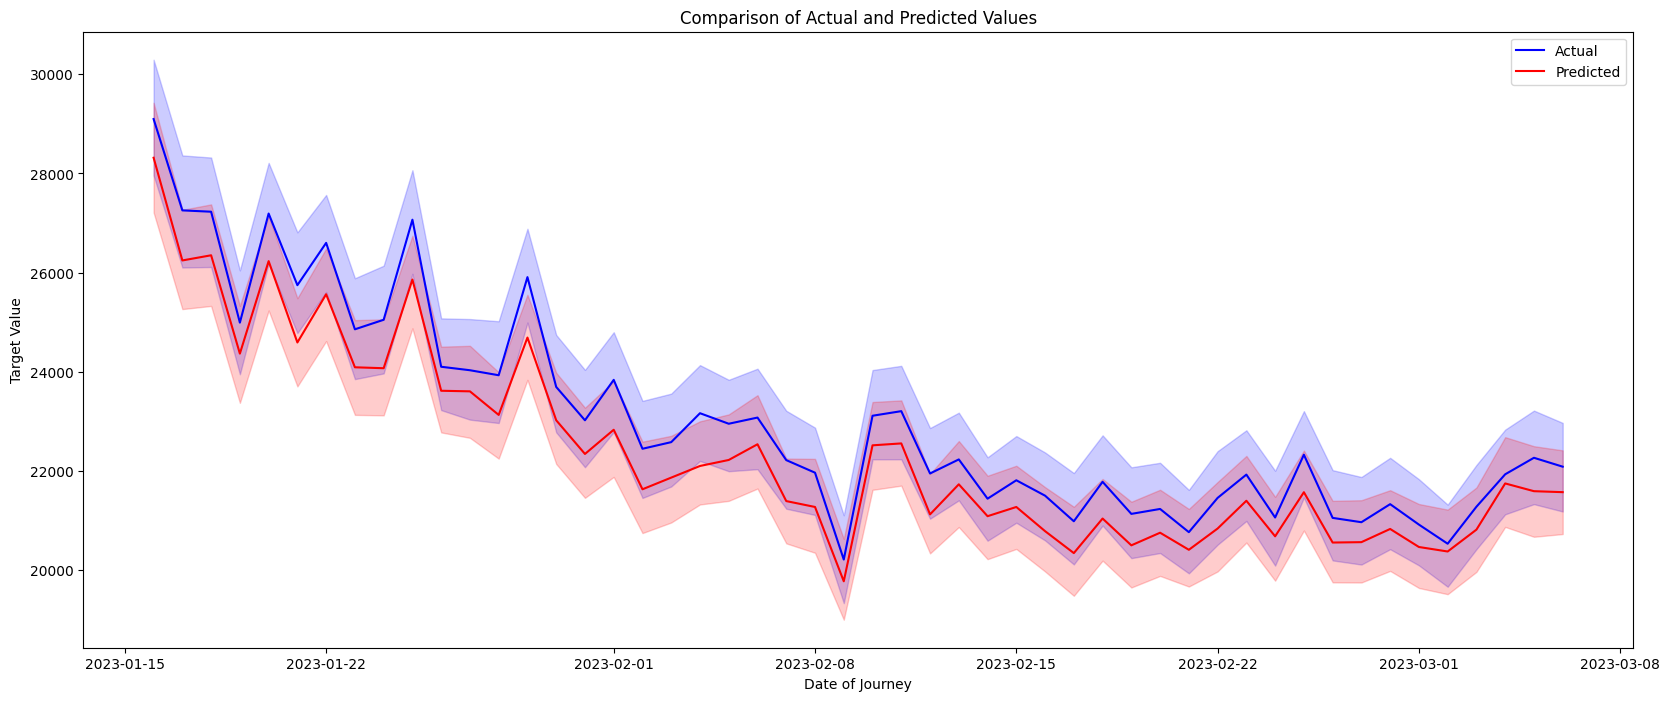

In [45]:
plt.figure(figsize=(20,8))
plt.figure(figsize=(20,8))
sns.lineplot(data=result, x='Date_of_journey', y='Price_actual', label='Actual', color='blue')
sns.lineplot(data=result, x='Date_of_journey', y='Price_pred', label='Predicted', color='red')
plt.xlabel('Date of Journey')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

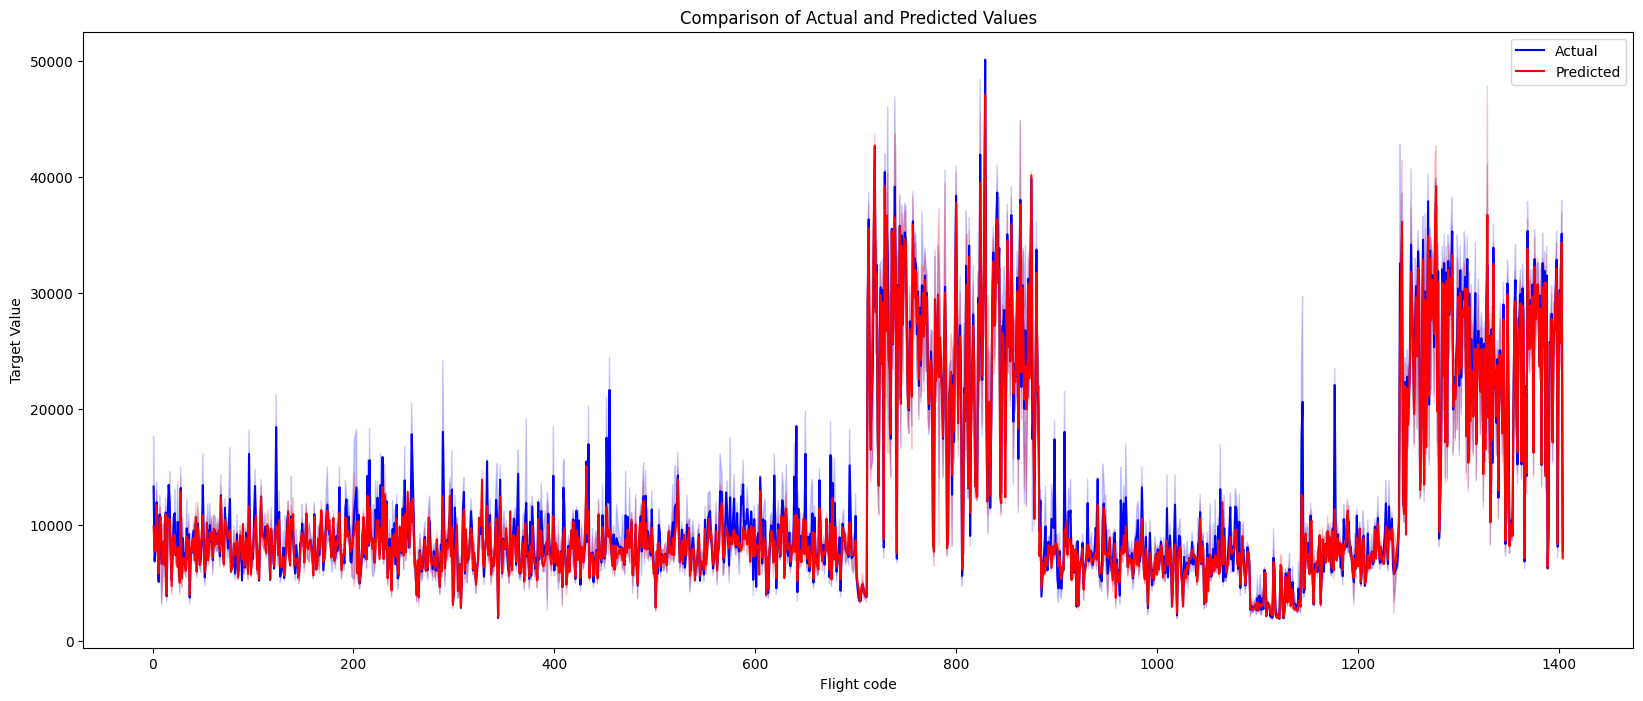

In [46]:
plt.figure(figsize=(20,8))
sns.lineplot(data=result, x='Flight_code', y='Price_actual', label='Actual', color='blue')
sns.lineplot(data=result, x='Flight_code', y='Price_pred', label='Predicted', color='red')
plt.xlabel('Flight code')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

In [47]:
from sklearn.ensemble import BaggingRegressor

model = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [48]:
score = r2_score(y_preds, y_test)
print (score)
print (MAPE (y_test, y_preds))

models_dict['BaggingRegressor'] = (model, score, MAPE(y_test, y_preds), RMSE (y_test, y_preds))

0.9647243802855967
8.15966515562579


In [49]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_preds})
result=df.merge(out,left_index=True,right_index=True)

result.head(100)

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare,Is_Holiday,Is_Long_Weekend,year,month,day,Price_actual,Price_pred
24,2023-01-16,1,1,1057,1,3,1,0,3,6,16.5000,1,6872,0,0,2023,1,16,6872,6976.50
30,2023-01-16,1,5,87,1,3,0,2,0,6,2.3333,1,7319,0,0,2023,1,16,7319,7744.13
31,2023-01-16,1,8,1396,1,3,2,2,2,6,2.2500,1,7320,0,0,2023,1,16,7320,11436.85
35,2023-01-16,1,4,899,1,3,0,0,2,6,9.7500,1,6873,0,0,2023,1,16,6873,8512.46
53,2023-01-16,1,5,46,1,3,0,2,2,6,2.2500,1,7844,0,0,2023,1,16,7844,7464.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,2023-01-17,5,5,195,1,3,0,0,2,6,6.2500,2,11257,0,0,2023,1,17,11257,13612.18
502,2023-01-17,5,8,1252,1,3,0,0,2,6,5.2500,2,11573,0,0,2023,1,17,11573,13540.62
508,2023-01-17,5,4,913,1,3,1,0,2,6,8.5833,2,11546,0,0,2023,1,17,11546,10989.25
517,2023-01-17,5,8,1327,1,3,1,0,0,6,6.4167,2,12570,0,0,2023,1,17,12570,21738.87


In [50]:
#make a df where Airline is 0 and Class is 1
airline_df = result[result['Airline']==0]
airline_df = airline_df[airline_df['Class']==1]


c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

<Figure size 2000x800 with 0 Axes>

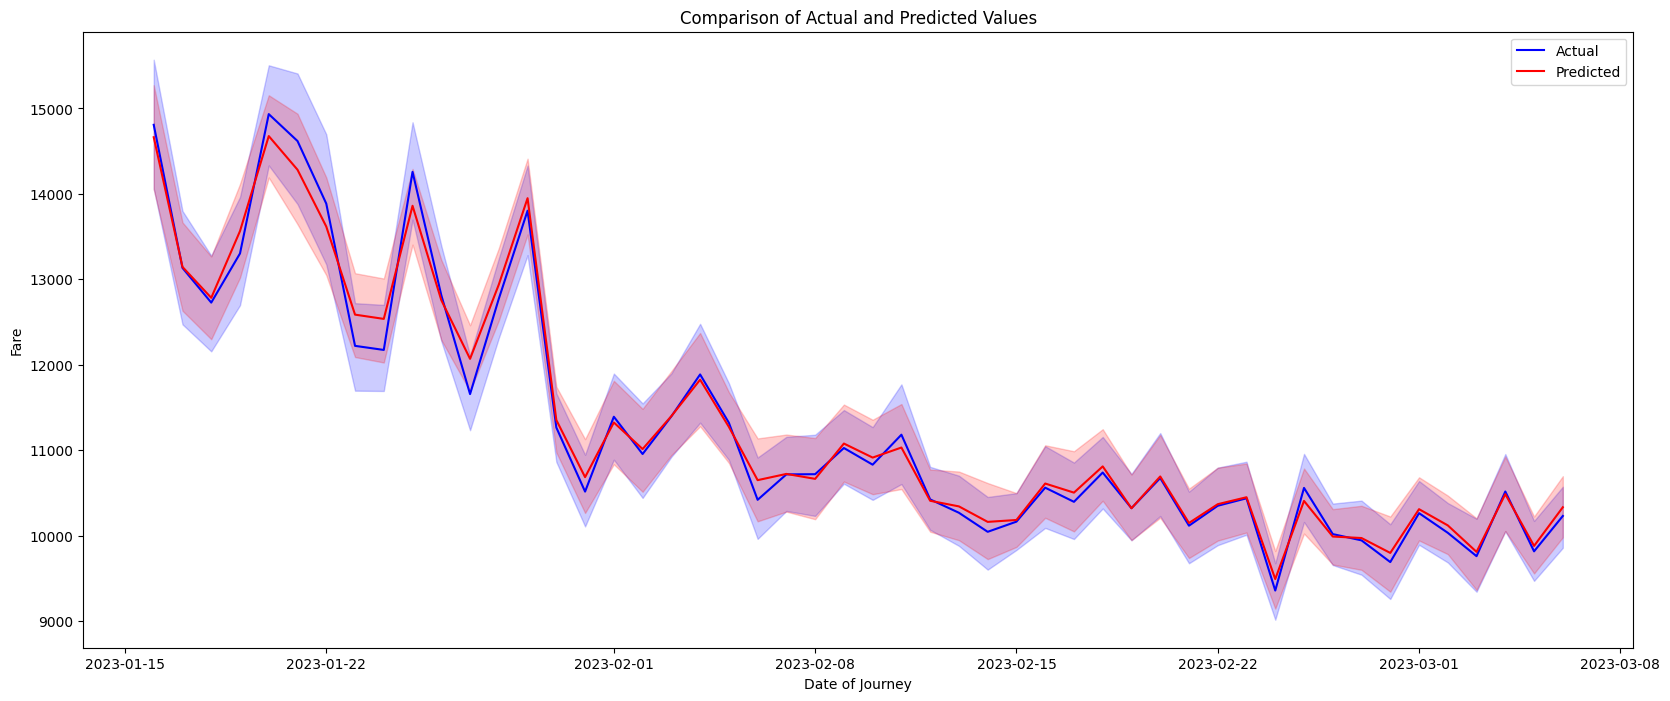

In [51]:
plt.figure(figsize=(20,8))
plt.figure(figsize=(20,8))
sns.lineplot(data=airline_df, x='Date_of_journey', y='Price_actual', label='Actual', color='blue')
sns.lineplot(data=airline_df, x='Date_of_journey', y='Price_pred', label='Predicted', color='red')
plt.xlabel('Date of Journey')
plt.ylabel('Fare')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

In [52]:
'''plt.figure(figsize=(20,8))
plt.figure(figsize=(20,8))
sns.lineplot(data=result, x='Date_of_journey', y='Price_actual', label='Actual', color='blue')
sns.lineplot(data=result, x='Date_of_journey', y='Price_pred', label='Predicted', color='red')
plt.xlabel('Date of Journey')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()'''

"plt.figure(figsize=(20,8))\nplt.figure(figsize=(20,8))\nsns.lineplot(data=result, x='Date_of_journey', y='Price_actual', label='Actual', color='blue')\nsns.lineplot(data=result, x='Date_of_journey', y='Price_pred', label='Predicted', color='red')\nplt.xlabel('Date of Journey')\nplt.ylabel('Target Value')\nplt.title('Comparison of Actual and Predicted Values')\nplt.legend()\nplt.show()"

In [53]:
model = "LSTMModel((lstm): LSTM(13, 50, num_layers=4, batch_first=True), (fc): Linear(in_features=50, out_features=1, bias=True))"

R2_Score = 0.8519364959859111

MAPE = 23.626225

RMSE = 4997.5527

models_dict['LSTM'] = (model, R2_Score, MAPE, RMSE)

In [54]:
models_df = pd.DataFrame(models_dict).T
models_df.columns = ['Model','R2 Score', 'MAPE', 'RMSE']


In [55]:
models_df

,Model,R2 Score,MAPE,RMSE
DecisionTreeRegressor,DecisionTreeRegressor(random_state=42),0.938409,9.54072,5094.820945
RandomForestRegressor,"(DecisionTreeRegressor(max_features=1.0, rando...",0.964705,8.160019,3784.299956
XGBRegressor,"XGBRegressor(base_score=None, booster='gbtree'...",0.958341,12.154522,4072.995218
CatBoostRegressor,<catboost.core.CatBoostRegressor object at 0x0...,0.939608,10.205842,4767.592226
BaggingRegressor,(DecisionTreeRegressor(random_state=1952926171...,0.964724,8.159665,3782.656469
LSTM,"LSTMModel((lstm): LSTM(13, 50, num_layers=4, b...",0.851936,23.626225,4997.5527
